# Installing Libraries

In [294]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [295]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Japan_used_cars_datasets.csv')

df.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


# Data Preprocessing for model buliding

In [296]:
df.shape

(2318, 11)

In [297]:
df.isnull().sum()

id                 0
price              0
mark               0
model              0
year               0
mileage            0
engine_capacity    0
transmission       0
drive              0
hand_drive         0
fuel               0
dtype: int64

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2318 non-null   int64 
 1   price            2318 non-null   int64 
 2   mark             2318 non-null   object
 3   model            2318 non-null   object
 4   year             2318 non-null   int64 
 5   mileage          2318 non-null   int64 
 6   engine_capacity  2318 non-null   int64 
 7   transmission     2318 non-null   object
 8   drive            2318 non-null   object
 9   hand_drive       2318 non-null   object
 10  fuel             2318 non-null   object
dtypes: int64(5), object(6)
memory usage: 199.3+ KB


There is both Object and integer data types, we need to object data to integer type

In [299]:
df.columns

Index(['id', 'price', 'mark', 'model', 'year', 'mileage', 'engine_capacity',
       'transmission', 'drive', 'hand_drive', 'fuel'],
      dtype='object')

In [300]:
df.describe()

,id,price,year,mileage,engine_capacity
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,1169.047023,971.522433,2005.972390,100013.194996,1507.010785
std,674.460724,288.673112,3.698863,52512.478883,549.585170
min,0.000000,80.000000,1979.000000,2000.000000,9.000000
25%,583.250000,776.000000,2004.000000,67000.000000,1300.000000
50%,1168.500000,1000.000000,2006.000000,94000.000000,1490.000000
75%,1753.750000,1213.000000,2009.000000,124000.000000,1800.000000
max,2335.000000,1400.000000,2015.000000,790000.000000,12340.000000


In [301]:
df.mark.value_counts()

toyota           1047
honda             382
nissan            320
mazda             148
suzuki            126
mitsubishi         65
daihatsu           56
subaru             54
volkswagen         52
bmw                27
hyundai             9
mercedes-benz       5
kia motors          4
isuzu               3
audi                3
smart               2
volvo               2
land rover          2
peugeot             2
hino                1
mitsuoka            1
ford                1
gm                  1
citroen             1
opel                1
chrysler            1
kubota              1
jaguar              1
Name: mark, dtype: int64

In [302]:
df.mark.nunique()

28

Data with higher Categories are need to drop 

In [303]:
df.model.value_counts()

fit                    270
vitz                   179
passo                  127
ist                     93
ractis                  85
                      ... 
sx4 sedan                1
207                      1
corolla ii               1
impreza sportswagon      1
estima t                 1
Name: model, Length: 258, dtype: int64

In [304]:
df.model.nunique()

258

In [305]:
df.transmission.value_counts()

at     2171
mt      117
cvt      30
Name: transmission, dtype: int64

In [306]:
df.transmission.nunique()

3

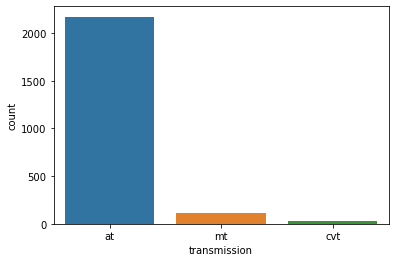

In [307]:
sns.countplot(x='transmission',data=df)
plt.show()

Auto transmission cars are high in number

In [308]:
df.drive.value_counts()

2wd    2121
4wd     192
awd       5
Name: drive, dtype: int64

In [309]:
df.drive.nunique()

3

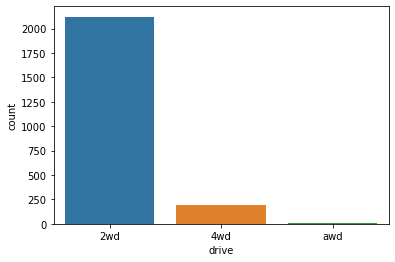

In [310]:
sns.countplot(x = 'drive',data=df)
plt.show()

In [311]:
df.hand_drive.value_counts()

rhd       2301
lhd         16
center       1
Name: hand_drive, dtype: int64

In [312]:
df.hand_drive.nunique()

3

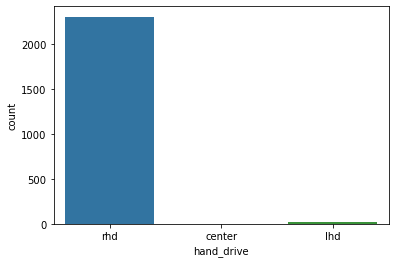

In [313]:
sns.countplot(x = 'hand_drive',data=df)
plt.show()

RIGHT HAND DRIVEN CARS HIGH IN NUMBER

In [314]:
df.fuel.value_counts()

gasoline    2290
diesel        18
lpg            7
hybrid         2
cng            1
Name: fuel, dtype: int64

In [315]:
df.fuel.nunique()

5

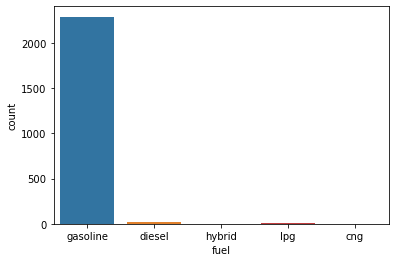

In [316]:
sns.countplot(x = 'fuel',data=df)
plt.show()

GASOLIN CARS HIGH NO WHICH ARE ECO - FRIENDLY

In [317]:

df = pd.get_dummies(df, columns=["transmission"], drop_first=True)
df = pd.get_dummies(df, columns=["drive"],drop_first=True)
df = pd.get_dummies(df, columns=["hand_drive"],drop_first=True)
df = pd.get_dummies(df, columns=["fuel"],drop_first=True)


In [318]:
df

,id,price,mark,model,year,mileage,engine_capacity,transmission_cvt,transmission_mt,drive_4wd,drive_awd,hand_drive_lhd,hand_drive_rhd,fuel_diesel,fuel_gasoline,fuel_hybrid,fuel_lpg
0,0,80,nissan,march,2003,80000,1240,0,0,0,0,0,1,0,1,0,0
1,1,110,nissan,march,2010,53000,1200,0,0,0,0,0,1,0,1,0,0
2,2,165,nissan,lafesta,2005,47690,2000,0,0,0,0,0,1,0,1,0,0
3,3,190,toyota,avensis,2008,130661,1990,0,0,0,0,0,1,0,1,0,0
4,4,190,daihatsu,mira,2006,66300,660,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2313,2331,1400,toyota,vitz,2009,121000,996,0,0,0,0,0,1,0,1,0,0
2314,2332,1400,toyota,estima,2003,101000,3000,0,0,0,0,0,1,0,1,0,0
2315,2333,1400,subaru,r2,2005,101000,660,1,0,0,0,0,1,0,1,0,0
2316,2334,1400,honda,z,2000,170000,660,0,0,1,0,0,1,0,1,0,0


In [319]:
df.drop(['id','mark','model',],axis=1,inplace=True)

In [320]:
df

,price,year,mileage,engine_capacity,transmission_cvt,transmission_mt,drive_4wd,drive_awd,hand_drive_lhd,hand_drive_rhd,fuel_diesel,fuel_gasoline,fuel_hybrid,fuel_lpg
0,80,2003,80000,1240,0,0,0,0,0,1,0,1,0,0
1,110,2010,53000,1200,0,0,0,0,0,1,0,1,0,0
2,165,2005,47690,2000,0,0,0,0,0,1,0,1,0,0
3,190,2008,130661,1990,0,0,0,0,0,1,0,1,0,0
4,190,2006,66300,660,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2313,1400,2009,121000,996,0,0,0,0,0,1,0,1,0,0
2314,1400,2003,101000,3000,0,0,0,0,0,1,0,1,0,0
2315,1400,2005,101000,660,1,0,0,0,0,1,0,1,0,0
2316,1400,2000,170000,660,0,0,1,0,0,1,0,1,0,0


In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             2318 non-null   int64
 1   year              2318 non-null   int64
 2   mileage           2318 non-null   int64
 3   engine_capacity   2318 non-null   int64
 4   transmission_cvt  2318 non-null   uint8
 5   transmission_mt   2318 non-null   uint8
 6   drive_4wd         2318 non-null   uint8
 7   drive_awd         2318 non-null   uint8
 8   hand_drive_lhd    2318 non-null   uint8
 9   hand_drive_rhd    2318 non-null   uint8
 10  fuel_diesel       2318 non-null   uint8
 11  fuel_gasoline     2318 non-null   uint8
 12  fuel_hybrid       2318 non-null   uint8
 13  fuel_lpg          2318 non-null   uint8
dtypes: int64(4), uint8(10)
memory usage: 95.2 KB


In [322]:
X=df.drop(columns=['price'])
y=df['price']

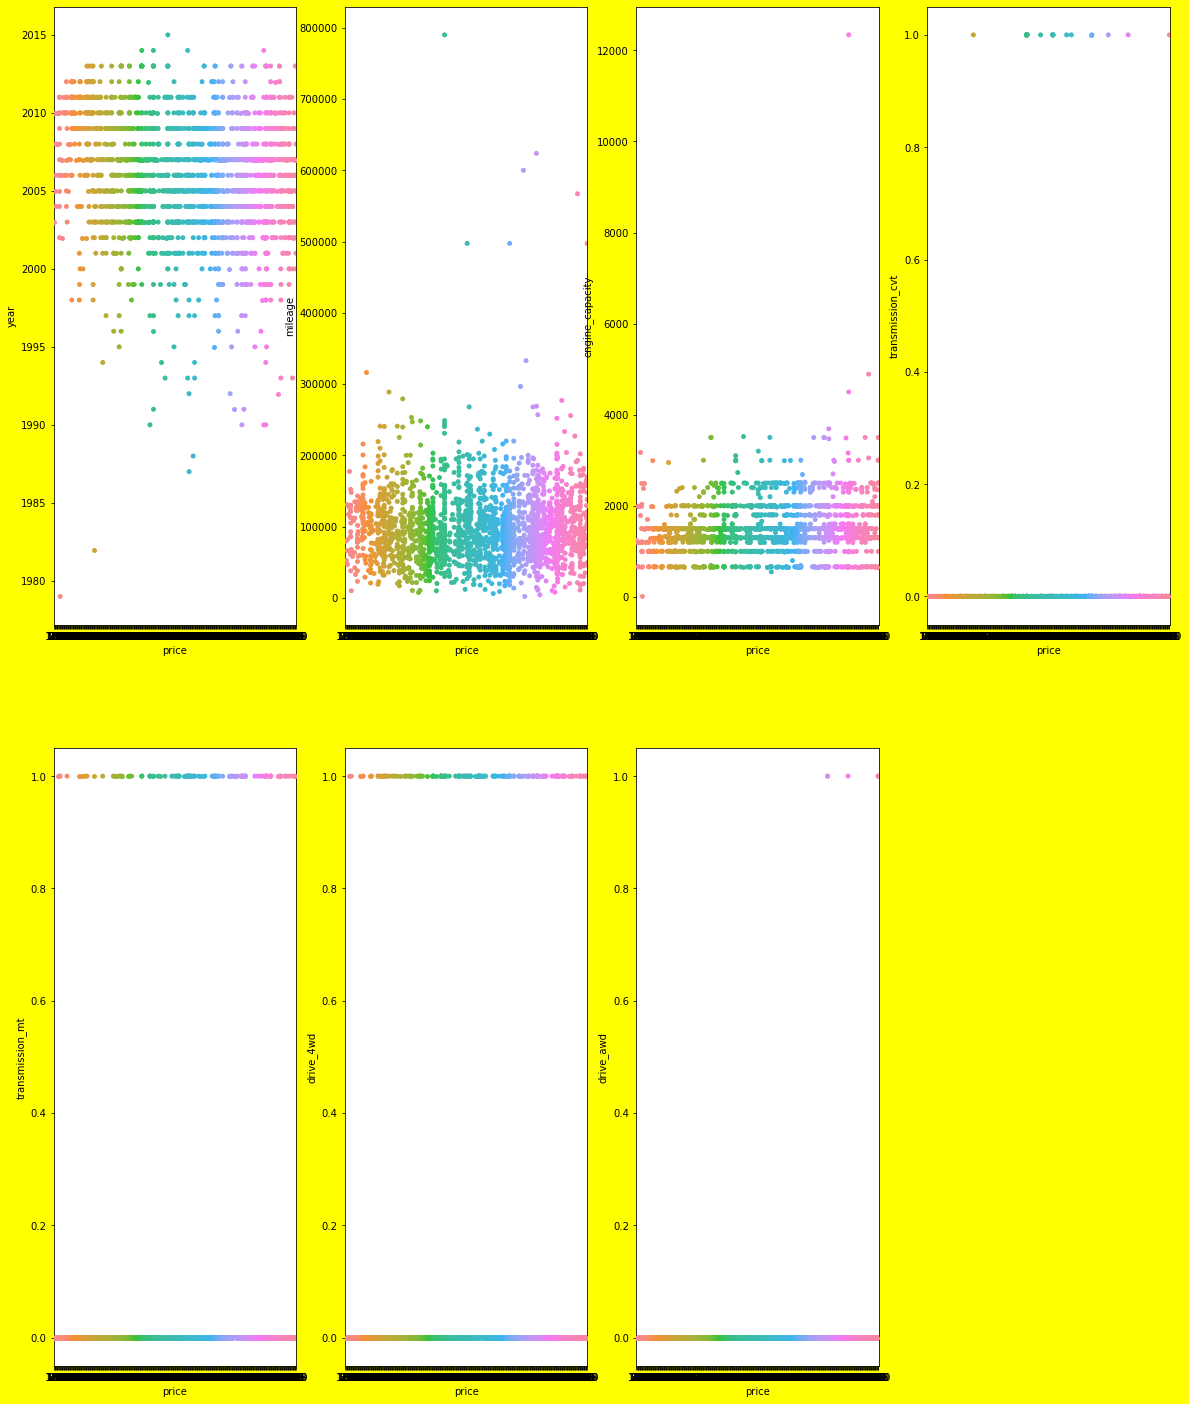

In [323]:
plt.figure(figsize=(20,25),facecolor = "yellow")
plotnumber=1
for column in X :
    if plotnumber<8:
        ax=plt.subplot(2,4,plotnumber)
        sns.stripplot(y,X[column])
        
    plotnumber+=1
plt.show()

There are many Outliers in year,milleage,engine_capacity hence we can't ignore them

# With the above diagram we can understood that
1) Maximum no of cars manufactured in between 2000-2015

2) By regular useage years increasing milage decreasing

3)Engine capacity also decreasing with the heavy use

4)High no of cars are Autogear Transmission

5)High no of cars are runs with gasoline

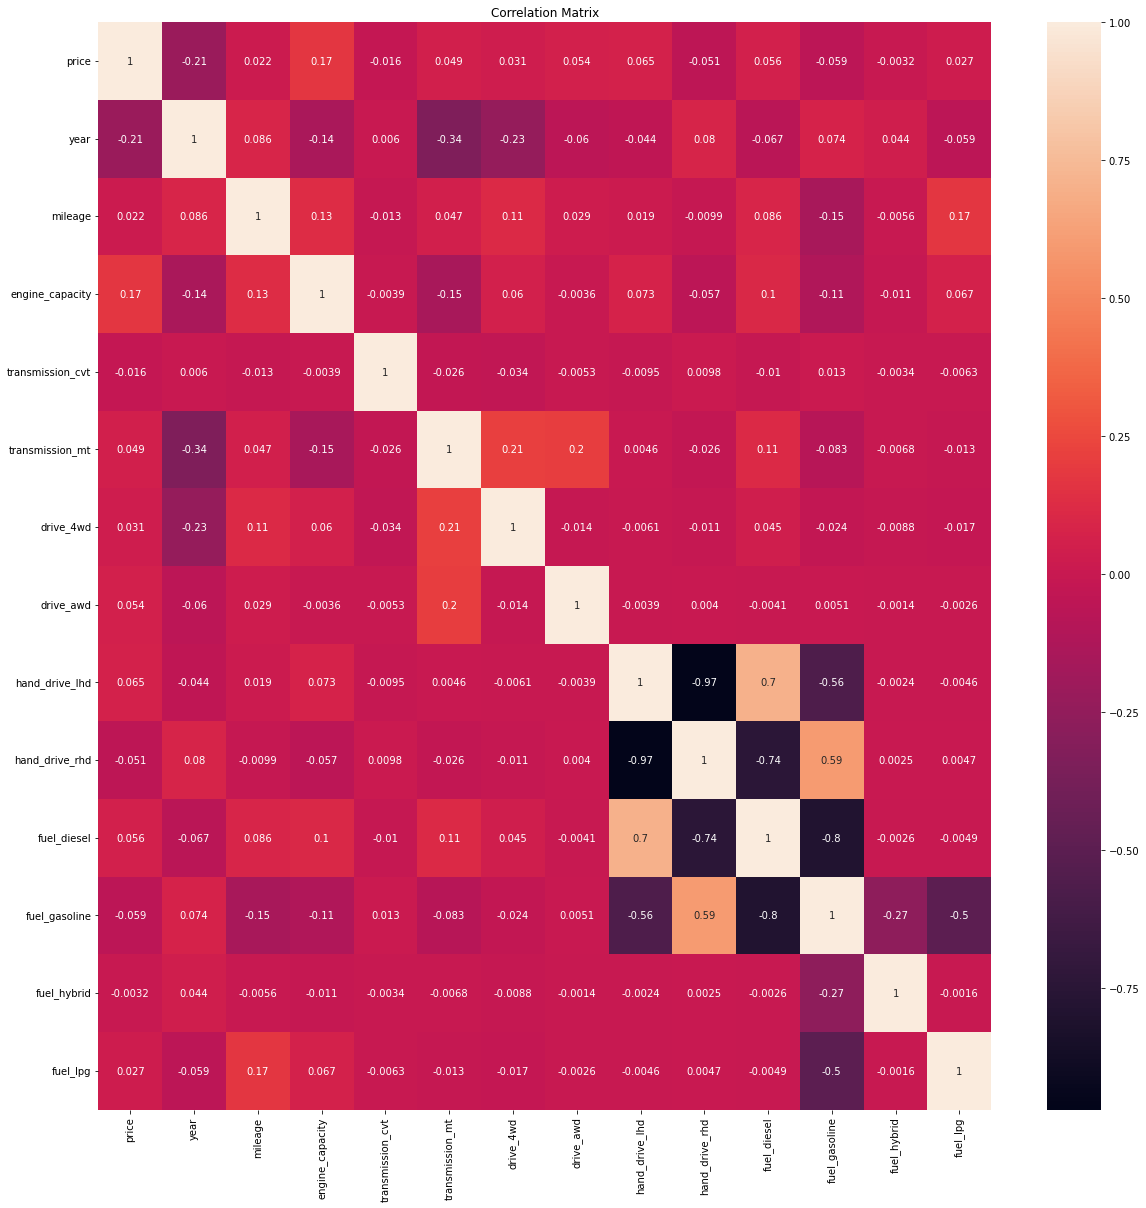

In [324]:
corr_mat = df.corr()
plt.figure(figsize=[20,20])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.savefig("Correlation_matrix.jpg")
plt.show()

In [325]:
df.skew().sort_values(ascending=False)

fuel_hybrid         34.022033
drive_awd           21.475543
fuel_lpg            18.126529
hand_drive_lhd      11.919135
fuel_diesel         11.222682
transmission_cvt     8.624153
transmission_mt      4.109377
engine_capacity      4.038892
mileage              3.089142
drive_4wd            3.029043
price               -0.466780
year                -0.845917
fuel_gasoline       -8.938755
hand_drive_rhd     -11.555653
dtype: float64

# Model Building

# Standizing & Removing Skewness

In [326]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [327]:
X_scaled

array([[-0.80376905, -0.38119536, -0.48594542, ...,  0.1105761 ,
        -0.02938635, -0.05503628],
       [ 1.0891129 , -0.8954698 , -0.5587433 , ...,  0.1105761 ,
        -0.02938635, -0.05503628],
       [-0.26294564, -0.99661044,  0.89721414, ...,  0.1105761 ,
        -0.02938635, -0.05503628],
       ...,
       [-0.26294564,  0.01879587, -1.54151457, ...,  0.1105761 ,
        -0.02938635, -0.05503628],
       [-1.61500417,  1.33305279, -1.54151457, ...,  0.1105761 ,
        -0.02938635, -0.05503628],
       [-0.26294564, -0.52747787,  2.71716095, ...,  0.1105761 ,
        -0.02938635, -0.05503628]])

In [328]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i)for i in range(X_scaled.shape[1])]

In [329]:
vif["features"] = X.columns
vif

,vif,features
0,1.283506,year
1,1.105550,mileage
2,1.127973,engine_capacity
3,1.001892,transmission_cvt
4,1.307437,transmission_mt
5,1.109177,drive_4wd
6,1.049306,drive_awd
7,17.550489,hand_drive_lhd
8,19.689745,hand_drive_rhd
9,20.240287,fuel_diesel


With above we identify that hand_drive ,fuel type showing high variance in price

In [330]:
from sklearn.model_selection import train_test_split

In [331]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.30,random_state=99)

# Linear Regression Model

In [332]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

LR = LinearRegression()
LR.fit(x_train, y_train)

# Prediction:
y_pred = LR.predict(x_test)

# Scores:
print(r2_score(y_test, y_pred))

print(mean_squared_error(y_test, y_pred))

0.04860585952097618
86886.19349944392


# MSE & MAE

In [333]:
mean_absolute_error(y_test,y_pred)

247.60756928638457

In [334]:
np.sqrt(mean_squared_error(y_test,y_pred))

294.76464085680954

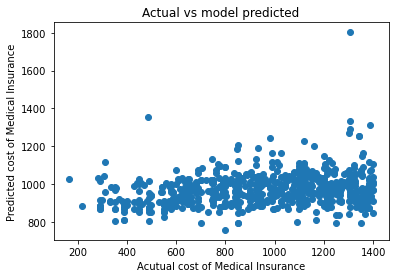

In [335]:
plt.scatter(y_test,y_pred)
plt.xlabel('Acutual cost of Medical Insurance')
plt.ylabel('Predicted cost of Medical Insurance')
plt.title('Actual vs model predicted')
plt.show()

# Ridge

In [336]:

from sklearn.linear_model import Ridge,RidgeCV

ridge = Ridge()
ridge.fit(x_train, y_train)

# Prediction:
y_pred = ridge.predict(x_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.048612063141301065
86885.62695301168


# MSE & MAE

In [337]:
mean_absolute_error(y_test,y_pred)

247.60556608439438

In [338]:
np.sqrt(mean_squared_error(y_test,y_pred))

294.7636798403285

# Ridge Cross Validation

In [339]:
ridgeCV =RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize = True)
ridgeCV.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [340]:
ridgeCV.alpha_

0.09099999999999998

In [341]:
ridge_model = Ridge(alpha=ridgeCV.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [342]:
ridge_model.score(x_test,y_test)

0.048606426761414356

# Lasso:

In [343]:

from sklearn.linear_model import Lasso,LassoCV
lass= Lasso()

lass.fit(x_train, y_train)

# Prediction:
y_pred = lass.predict(x_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.04940700744359361
86813.02856131305


# MSE & MAE

In [344]:
mean_absolute_error(y_test,y_pred)

247.52296171190886

In [345]:
np.sqrt(mean_squared_error(y_test,y_pred))

294.6405073327716

# Lasso Cross Validation

In [346]:
lasscv = LassoCV(alphas=None,max_iter = 999,normalize=True)

lasscv.fit(x_train,y_train)

LassoCV(max_iter=999, normalize=True)

In [347]:
alpha=lasscv.alpha_

alpha

0.05871862748675223

In [348]:
lasso_reg = Lasso(alpha = 1.87)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=1.87)

In [349]:
lasso_reg.score(x_test,y_test)

0.05015260255468168

# Random Forest Regressor:

In [350]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

# Prediction:
y_pred =rf.predict(x_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.08749847202876027
83334.32060862627


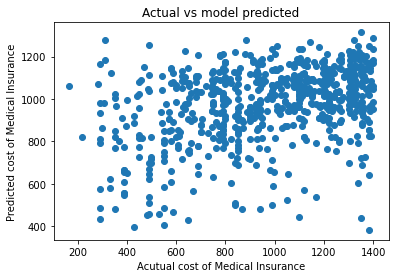

In [351]:
plt.scatter(y_test,y_pred)
plt.xlabel('Acutual cost of Medical Insurance')
plt.ylabel('Predicted cost of Medical Insurance')
plt.title('Actual vs model predicted')
plt.show()

# MSE & MAE

In [352]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [353]:
mean_absolute_error(y_test,y_pred)

229.8042290982485

In [354]:
np.sqrt(mean_squared_error(y_test,y_pred))

288.67684460071655

# Ada Boost Model Training

In [355]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics

In [356]:
ada = AdaBoostRegressor()

In [357]:
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [358]:
y_pred=ada.predict(x_train)

In [359]:
accuracy=metrics.r2_score(y_train,y_pred)
print('R Square score',accuracy)

R Square score 0.14998904881465291


In [360]:
y_test_pred = ada.predict(x_test)

In [361]:
accuracy=metrics.r2_score(y_test,y_test_pred)

In [362]:
print('R Square score', accuracy)

R Square score 0.09386395028120664


# Hyper Parameter Tuning using Randomized searchCV

In [363]:
from sklearn.model_selection import RandomizedSearchCV

In [364]:
params={'n_estimators':[47,50,60,70],
       'learning_rate':[0.25,0.30,0.40]}

In [365]:
rnd_srch=RandomizedSearchCV(AdaBoostRegressor(),cv=5,param_distributions=params)
rnd_srch.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.25, 0.3, 0.4],
                                        'n_estimators': [47, 50, 60, 70]})

In [366]:
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.3, n_estimators=60)

In [367]:
ada=AdaBoostRegressor(learning_rate=0.27,n_estimators=50)
ada.fit(x_train,y_train)
y_pred=ada.predict(x_test)
print("***Accuracy post Tuning*******")
print(metrics.r2_score(y_test,y_pred))

***Accuracy post Tuning*******
0.09961527871849973


In [368]:


import pickle
filename = 'Japanese used cars.pkl'
pickle.dump(AdaBoostRegressor, open(filename, 'wb'))

# Hence Random Forest Regressor  is showing high performance with boosting 